In [3]:
import pandas as pd
import numpy as np
from multiprocessing import Pool as ThreadPool
from matplotlib import pyplot as plt
from tqdm import tqdm
import dask.config
import xarray as xr
import xbatcher as xb
import numpy as np
import dask
import torch
import random
import os

from data.era5 import gen_bgen
from metrics.metrics import WeightedRMSE
from models.latent_umbrella_net import LatentUmbrellaNet
from models.autoencoder import Autoencoder

NUM_WORKERS = 6

In [51]:
bgen = gen_bgen(train=True)

batch = bgen[0]

stacked = batch.to_stacked_array(
    new_dim="channel", sample_dims=["latitude", "longitude"]
).transpose("channel", "longitude", "latitude")

item = torch.tensor(stacked.data)
item = item.unsqueeze(0)
item = item[:, :, :, :-1]

In [67]:
t2m = item[:, 0, :, :].flatten()
u10 = item[:, 1, :, :].flatten()
v10 = item[:, 2, :, :].flatten()
msl = item[:, 3, :, :].flatten()
temperature = item[:, 4:17, :, :].flatten()
u = item[:, 17:30, :, :].flatten()
v = item[:, 30:43, :, :].flatten()
z = item[:, 43:56, :, :].flatten()
h = item[:, 56:69, :, :].flatten()

temperature = torch.cat([temperature, t2m])
wind = torch.cat([u, v, u10, v10])


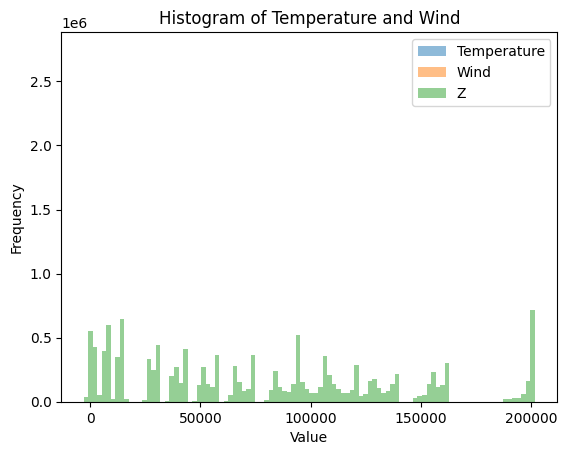

In [70]:
plt.hist(temperature, bins=100, alpha=0.5, label="Temperature")
plt.hist(wind, bins=100, alpha=0.5, label="Wind")
plt.hist(z, bins=100, alpha=0.5, label="Z")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Temperature and Wind")
plt.legend()
plt.show()